# US electricity consumption and production analysis

## Get the data

In [455]:
# Standard Data Science Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler

# Miscellaneous Libraries
import requests
import zipfile
import io
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor




Notes:

Net generation excludes electricity use for power plant operations.
Terawatt hours, abbreviated as TWh, is a unit of energy representing one trillion watt hours.

Important links

[Electricity generation, capacity, and sales in the United States
](https://www.eia.gov/energyexplained/electricity/electricity-in-the-us-generation-capacity-and-sales.php#:~:text=In%202022%2C%20net%20generation%20of,solar%20photovoltaic%20(PV)%20systems.)

[Electricity data browser
](https://www.eia.gov/electricity/data.php)


Start with net generation data

#### Run the following packages to get Data

In [445]:
production_url = 'https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T01.02'
consumption_url = 'https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T01.03'
imports_url = 'https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T01.04A'
exports_url = 'https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T01.04B'
net_generation_url = 'https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T07.02A'

production = pd.read_csv(production_url)
consumption = pd.read_csv(consumption_url)
imports = pd.read_csv(imports_url)
exports = pd.read_csv(exports_url)
net_generation = pd.read_csv(net_generation_url)

In [446]:
net_generation_df = net_generation.pivot(index='YYYYMM', columns='Description', values='Value').reset_index()
production_df = production.pivot(index='YYYYMM', columns='Description', values='Value').reset_index()
consumption_df = consumption.pivot(index='YYYYMM', columns='Description', values='Value').reset_index()
imports_df = imports.pivot(index='YYYYMM', columns='Description', values='Value').reset_index()
exports_df = exports.pivot(index='YYYYMM', columns='Description', values='Value').reset_index()

In [447]:
merged_df = us_total_production_df.merge(production_df, on='YYYYMM', how='left')
merged_df = merged_df.merge(consumption_df, on='YYYYMM', how='left')
merged_df = merged_df.merge(imports_df, on='YYYYMM', how='left')
df_train = merged_df.merge(exports_df, on='YYYYMM', how='left')
df_train = df_train.replace('Not Available',0)
df_train = df_train[~(df_train['YYYYMM'] % 100 == 13)]
df_train.shape

(608, 45)

In [479]:
df_train

Description,YYYYMM,"Electricity Net Generation Total (including from sources not shown), All Sectors",Biomass Energy Production,Coal Production,Crude Oil Production,Geothermal Energy Production,Hydroelectric Power Production,Natural Gas (Dry) Production,Natural Gas Plant Liquids Production,Nuclear Electric Power Production,...,Total Primary Energy Imports,Biomass Exports,Coal Coke Exports,Coal Exports,Crude Oil Exports,Electricity Exports,Natural Gas Exports,"Petroleum Products, Excluding Biofuels, Exports",Total Energy Exports,"Total Petroleum, Excluding Biofuels, Exports"
24,197301,160217.989,0.129787,1.166486,1.649833,0.00049,0.089562,1.908249,0.208064,0.068103,...,1.17308,0,0.001885,0.079655,0,0.000745,0.005941,0.037555,0.125781,0.037555
25,197302,143538.699,0.117338,1.086072,1.525783,0.000448,0.079544,1.922543,0.195184,0.064634,...,1.168005,0,0.000843,0.071118,0,0.000673,0.006219,0.04203,0.120883,0.04203
26,197303,148158.37,0.129938,1.196571,1.667094,0.000464,0.088284,1.86843,0.214807,0.072494,...,1.309473,0,0.002827,0.092288,0,0.000745,0.004113,0.039976,0.13995,0.039976
27,197304,139589.44,0.125636,1.11223,1.616791,0.000542,0.083152,1.777561,0.20969,0.06407,...,1.085169,0,0.001513,0.136198,0,0.000721,0.008201,0.047552,0.194185,0.047552
28,197305,147395.124,0.129834,1.216978,1.665377,0.000505,0.085643,1.859241,0.215398,0.062111,...,1.162804,0,0.00563,0.139124,0.000742,0.000745,0.008942,0.041593,0.196775,0.042335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,202304,299673.099,0.404131,0.949004,2.157078,0.009815,0.059646,3.190498,0.683554,0.592009,...,1.75565,0.023978,0.002357,0.180365,0.688039,0.00571,0.626283,0.826667,2.353399,1.514706
678,202305,327532.624,0.437506,0.974503,2.236726,0.01007,0.093759,3.326434,0.706581,0.642269,...,1.818436,0.024406,0.003101,0.211618,0.67203,0.004365,0.643533,0.870946,2.429998,1.542976
679,202306,356672.385,0.429839,0.953203,2.198764,0.009562,0.066434,3.211603,0.699985,0.678755,...,1.828067,0.025586,0.003265,0.194845,0.65573,0.004695,0.612179,0.892332,2.388633,1.548062
680,202307,425611.328,0.437109,0.99295,2.283411,0.00984,0.072463,3.320908,0.71431,0.730186,...,1.811351,0.022972,0.004399,0.173862,0.68008,0.001925,0.639005,0.92137,2.443614,1.60145


In [451]:
df_gb = df_train.drop(columns=['YYYYMM'])

In [480]:
y_df_gb = df_train['Electricity Net Generation Total (including from sources not shown), All Sectors']
x_df_gb = df_train.drop('Electricity Net Generation Total (including from sources not shown), All Sectors', axis = 1)

In [481]:
x_df_gb_train, x_df_gb_test, y_df_gb_train, y_df_gb_test = train_test_split(x_df_gb, y_df_gb, test_size = 0.20, random_state = 0)

In [482]:
gbr = GradientBoostingRegressor(n_estimators = 500)

gbr.fit(x_df_gb_train,y_df_gb_train)

GradientBoostingRegressor(n_estimators=500)

In [483]:
y_pred = gbr.predict(x_df_gb_test)
print(y_pred)

[358578.1379436  174730.700678   293390.1549931  286043.9166946
 191065.99136088 170479.64674487 336300.71091295 285026.7810039
 238160.60967815 345007.35756151 354865.60987291 356786.53855406
 213778.38719954 295700.33201769 320294.97256302 304594.08945239
 357828.94097134 329364.74224263 354703.0306248  330382.33443169
 197623.0925844  255434.9320804  257123.94565019 314901.10986501
 252596.65624044 316967.67053619 229641.98544875 208025.90375288
 280282.27755336 305117.82737441 289863.70398001 299966.67204011
 351437.38296053 298425.53763229 206427.65198005 353458.42807144
 400995.31733938 306390.59649142 293245.57074397 337850.975105
 268654.03334167 238470.47915442 147164.63194637 307594.6957014
 403561.0017786  317531.32333822 365004.48797828 301594.5134882
 150486.70457492 372690.82000631 287961.14520769 394438.88518303
 359309.34091474 228135.67599341 330627.11940299 212950.41312978
 343094.40723464 308801.37297703 156531.87094407 233430.74733006
 181790.20359154 254974.1229074

In [484]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_df_gb_test)
print(mae)

7055.880728527694


In [485]:
feature_scores = pd.Series(gbr.feature_importances_, index = x_df_gb_train.columns).sort_values(ascending = False)
print(feature_scores)

Description
Nuclear Electric Power Consumption                                0.465204
YYYYMM                                                            0.205247
Nuclear Electric Power Production                                 0.166925
Coal Consumption                                                  0.079549
Solar Energy Production                                           0.014628
Wind Energy Consumption                                           0.012049
Solar Energy Consumption                                          0.011067
Geothermal Energy Production                                      0.008279
Total Primary Energy Consumption                                  0.007938
Geothermal Energy Consumption                                     0.005896
Electricity Imports                                               0.005263
Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)    0.003536
Total Fossil Fuels Consumption                                    0.001945
Natural Gas P

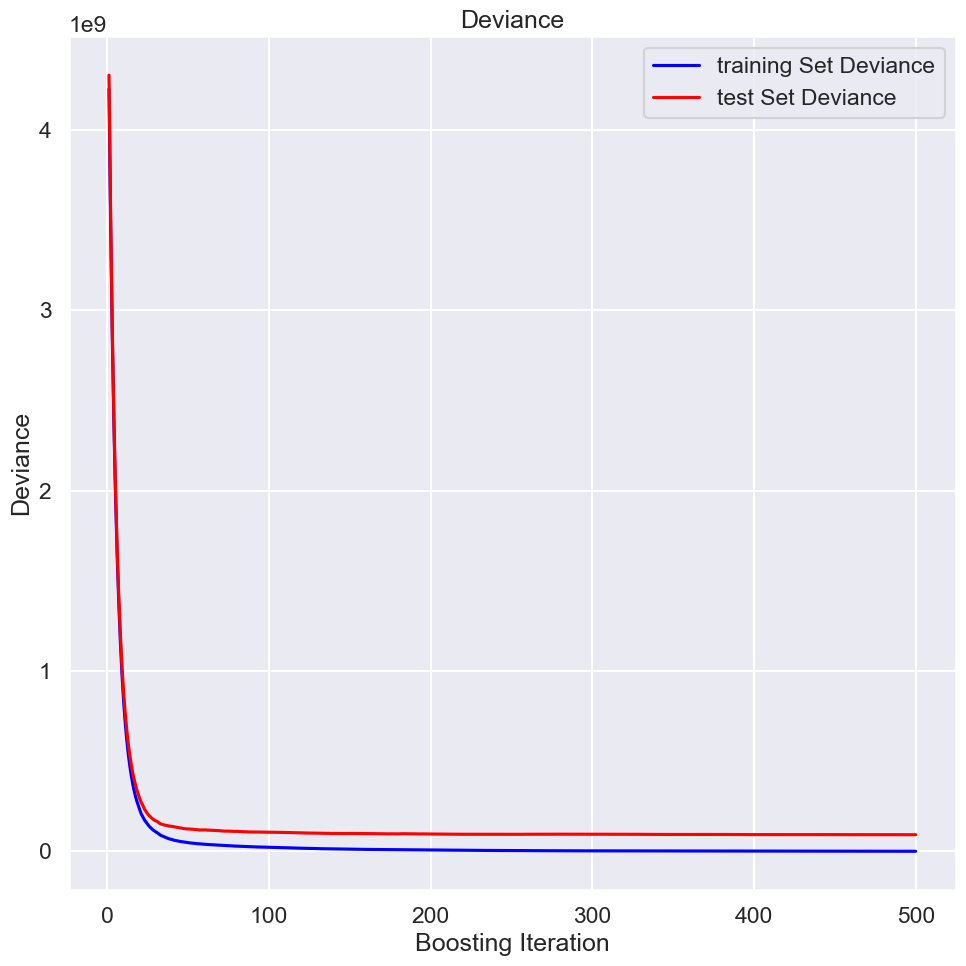

In [486]:
test_score = np.zeros((500,),dtype=np.float64)
for i , y_pred in enumerate(gbr.staged_predict(x_df_gb_test)):
    test_score[i] = mean_squared_error(y_df_gb_test, y_pred)

fig = plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1, gbr.train_score_, 'b-',label = 'training Set Deviance')
plt.plot(np.arange(500) + 1,test_score, 'r-',label = 'test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iteration')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [487]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(x_df_gb, y_df_gb)

GradientBoostingRegressor(random_state=42)

In [488]:
predictions_future = model.predict(x_df_gb)

In [491]:
len(predictions_future)

608

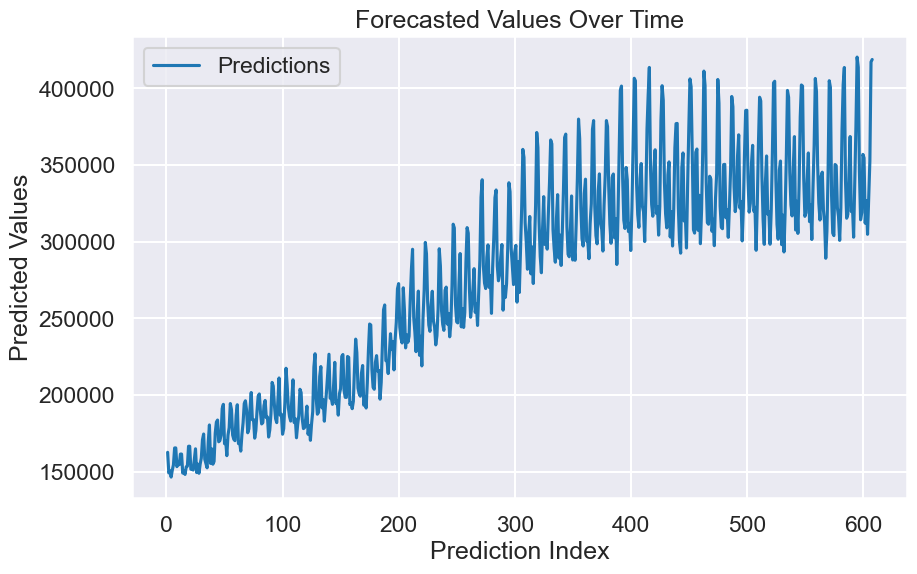

In [490]:
# Assuming you have predictions_future from your model
# Assuming len(predictions_future) is the number of predictions made

# Create a generic index for the predicted values
index_future = range(1, len(predictions_future) + 1)

# Plot the predictions using the generic index
plt.figure(figsize=(10, 6))
plt.plot(index_future, predictions_future, label='Predictions')
plt.xlabel('Prediction Index')
plt.ylabel('Predicted Values')
plt.title('Forecasted Values Over Time')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with real data
# Assuming 'dates_column' is the column containing dates
# Assuming 'y_real' is the column with the real values

# Plot real data
plt.plot(df_train['YYYYMM'], df_train['Electricity Net Generation Total (including from sources not shown), All Sectors'], label='Real Data', marker='o')

# Plot predictions
# Assuming 'dates_future' is the future dates associated with predictions
plt.plot(dates_future, predictions_future, label='Predictions', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Real Data vs Predictions')
plt.legend()
plt.show()


In [444]:
df_train[df_train.duplicated()]

Description,"Electricity Net Generation Total (including from sources not shown), All Sectors",Biomass Energy Production,Coal Production,Crude Oil Production,Geothermal Energy Production,Hydroelectric Power Production,Natural Gas (Dry) Production,Natural Gas Plant Liquids Production,Nuclear Electric Power Production,Solar Energy Production,...,Total Primary Energy Imports,Biomass Exports,Coal Coke Exports,Coal Exports,Crude Oil Exports,Electricity Exports,Natural Gas Exports,"Petroleum Products, Excluding Biofuels, Exports",Total Energy Exports,"Total Petroleum, Excluding Biofuels, Exports"
YYYYMM,,,,,,,,,,,,,,,,,,,,,


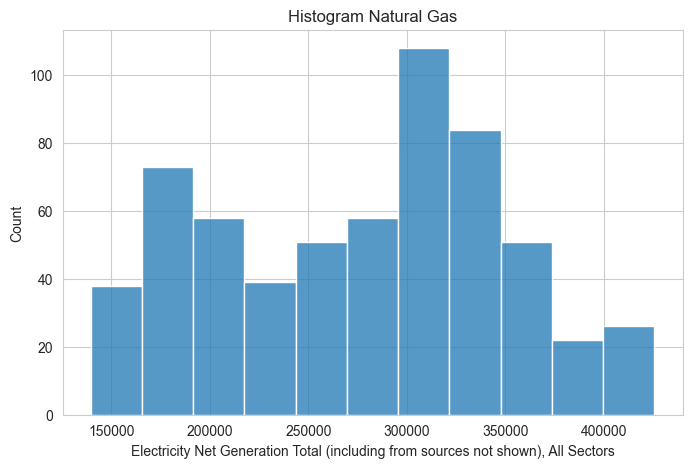

In [407]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df_train['Electricity Net Generation Total (including from sources not shown), All Sectors'])
plt.title('Histogram Natural Gas')

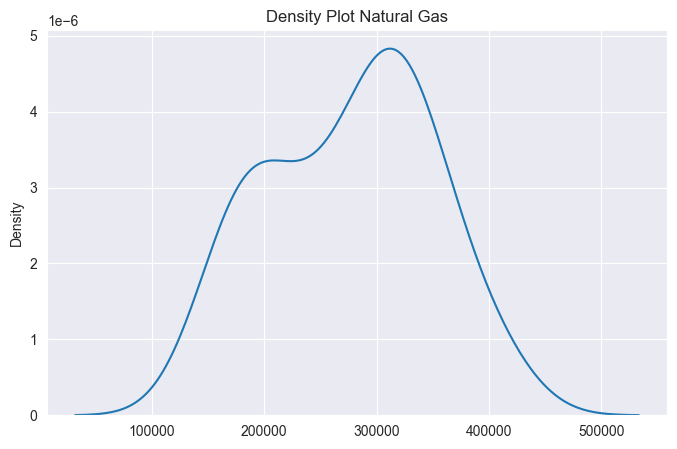

In [408]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
plt.title('Density Plot Natural Gas')
sns.kdeplot(np.array(df_train['Electricity Net Generation Total (including from sources not shown), All Sectors']), bw=0.5)

In [398]:
numeric_columns = df_train.columns
df_train[numeric_columns] = df_train[numeric_columns].apply(pd.to_numeric, errors='coerce', downcast='float')

In [399]:
var_columns = [c for c in df_train.columns if c not in ['YYYYMM','Electricity Net Generation Total (including from sources not shown), All Sectors']]
X = df_train.loc[:,var_columns]
y = df_train.loc[:,'Electricity Net Generation Total (including from sources not shown), All Sectors']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2,random_state = 42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((486, 43), (122, 43), (486,), (122,))

In [ ]:
train_summary = X_train.describe()
test_summary = X_valid.describe()


In [418]:
X_valid

Description,Biomass Energy Production,Coal Production,Crude Oil Production,Geothermal Energy Production,Hydroelectric Power Production,Natural Gas (Dry) Production,Natural Gas Plant Liquids Production,Nuclear Electric Power Production,Solar Energy Production,Total Fossil Fuels Production,...,Total Primary Energy Imports,Biomass Exports,Coal Coke Exports,Coal Exports,Crude Oil Exports,Electricity Exports,Natural Gas Exports,"Petroleum Products, Excluding Biofuels, Exports",Total Energy Exports,"Total Petroleum, Excluding Biofuels, Exports"
142,0.204375,1.582727,1.413234,0.001193,0.091907,1.566672,0.166183,0.223538,0.000000,4.728817,...,0.872937,0.000000,0.002517,0.235078,0.049422,0.000785,0.004613,0.081521,0.373937,0.130944
34,0.125643,1.178337,1.594008,0.000620,0.069063,1.825548,0.212610,0.088773,0.000000,4.810504,...,1.321809,0.000000,0.002182,0.139922,0.000000,0.000721,0.005673,0.034955,0.183453,0.034955
223,0.255188,1.621095,1.479516,0.002747,0.073601,1.454528,0.189208,0.430975,0.000004,4.744347,...,1.461137,0.000000,0.005869,0.207886,0.024851,0.002803,0.003845,0.122357,0.367610,0.147207
107,0.176833,1.587453,1.467104,0.001056,0.086230,1.611138,0.182066,0.174776,0.000000,4.847761,...,1.581381,0.000000,0.004847,0.158705,0.040820,0.000612,0.004670,0.041019,0.250673,0.081839
606,0.439367,1.296157,1.731449,0.009671,0.067859,2.478669,0.444890,0.696756,0.020501,5.951165,...,2.023431,0.016242,0.003359,0.222870,0.265804,0.002808,0.290316,0.856156,1.657555,1.121960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.262322,1.641951,1.215054,0.006014,0.071587,1.533519,0.202273,0.590418,0.006401,4.592797,...,1.775181,0.000000,0.002094,0.153532,0.009930,0.000529,0.010793,0.136325,0.313203,0.146255
202,0.248974,1.750646,1.513707,0.002647,0.073498,1.333276,0.170889,0.383103,0.000004,4.768518,...,1.243122,0.000000,0.001656,0.189425,0.027103,0.001850,0.005497,0.123053,0.348583,0.150156
195,0.248837,1.695601,1.620595,0.003071,0.098081,1.464062,0.185657,0.325549,0.000003,4.965916,...,0.918255,0.000000,0.001941,0.161741,0.038147,0.004097,0.005340,0.094050,0.305316,0.132198
612,0.425820,1.178256,1.797254,0.009272,0.095929,2.523365,0.461706,0.618237,0.036049,5.960580,...,2.125120,0.021268,0.002974,0.268014,0.329423,0.005533,0.281452,0.883188,1.791851,1.212611


In [400]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [401]:
predictions = model.predict(X_valid)

In [403]:
predictions

array([184552.78695, 160474.28466, 201383.89894, 186427.49979,
       331100.77901, 227154.36453, 357759.28377, 264807.29667,
       186065.76204, 176845.64749, 266744.72457, 311856.9113 ,
       239326.13177, 279006.47173, 254168.20597, 316817.53535,
       253077.46941, 321332.49496, 351927.00958, 319239.94701,
       278611.56771, 308490.38559, 197416.48892, 187138.48827,
       182918.617  , 310084.22998, 153349.31561, 318556.01452,
       174601.14773, 293927.15568, 287311.7367 , 191656.48943,
       279411.2173 , 162011.42712, 353673.97643, 357436.08036,
       322649.64053, 294285.48395, 187019.51531, 238404.80008,
       190289.30657, 202206.5821 , 183006.09911, 243846.90603,
       271673.79416, 256165.13425, 354049.77218, 337275.77913,
       154363.15458, 301880.29427, 185817.38944, 167075.8921 ,
       330796.86607, 397030.26251, 298576.20696, 318256.58811,
       330568.27915, 353813.86676, 321477.56798, 293019.54313,
       331694.00665, 221459.03052, 257476.98914, 279033

In [404]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_valid, predictions)
mse = mean_squared_error(y_valid, predictions)
r2 = r2_score(y_valid, predictions)

print(f'MAE: {mae}, MSE: {mse}, R^2: {r2}')

MAE: 7902.716422049196, MSE: 100223523.2447376, R^2: 0.975865374606532


In [405]:
# Assuming 'model' is your trained model
predictions_train = model.predict(X_train)
predictions_valid = model.predict(X_valid)

mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

mae_valid = mean_absolute_error(y_valid, predictions_valid)
mse_valid = mean_squared_error(y_valid, predictions_valid)
r2_valid = r2_score(y_valid, predictions_valid)

print("Training Set:")
print(f'MAE: {mae_train}, MSE: {mse_train}, R²: {r2_train}')

print("\nValidation Set:")
print(f'MAE: {mae_valid}, MSE: {mse_valid}, R²: {r2_valid}')


Training Set:
MAE: 3473.149625823034, MSE: 22982287.312519357, R²: 0.9957210689364531

Validation Set:
MAE: 7902.716422049196, MSE: 100223523.2447376, R²: 0.975865374606532


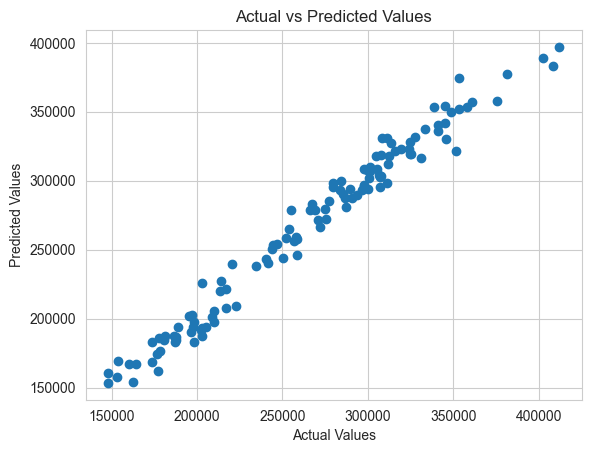

In [406]:
plt.scatter(y_valid, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [333]:
importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                                              Feature  Importance
18                 Nuclear Electric Power Consumption    0.458168
7                   Nuclear Electric Power Production    0.404615
14                                   Coal Consumption    0.076719
22                   Total Primary Energy Consumption    0.006348
17  Natural Gas Consumption (Excluding Supplementa...    0.006329
29                                Electricity Imports    0.006074
8                             Solar Energy Production    0.004348
20                           Solar Energy Consumption    0.003576
3                        Geothermal Energy Production    0.003198
15                      Geothermal Energy Consumption    0.002424
28                                  Crude Oil Imports    0.002152
38                                Electricity Exports    0.001865
21                     Total Fossil Fuels Consumption    0.001594
32       Total Petroleum, Excluding Biofuels, Imports    0.001541
19        

In [420]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the validation set
gb_predictions = gb_model.predict(X_valid)

# Evaluate the model
gb_mae = mean_absolute_error(y_valid, gb_predictions)
gb_mse = mean_squared_error(y_valid, gb_predictions)
gb_r2 = r2_score(y_valid, gb_predictions)

print(f'Gradient Boosting - MAE: {gb_mae}, MSE: {gb_mse}, R^2: {gb_r2}')


Gradient Boosting - MAE: 7754.1235272252125, MSE: 96402926.09430431, R^2: 0.97678540493494


In [425]:
from statsmodels.tsa.stattools import kpss

# Assuming 'y_train' is your target variable related to electricity generation
kpss_test_stat, kpss_p_value, _, kpss_critical_values = kpss(y_train)

# Display the test results
print(f'KPSS Test Statistic: {kpss_test_stat}')
print(f'p-value: {kpss_p_value}')
print('Critical Values:')
for key, value in kpss_critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if kpss_p_value < 0.05:
    print('\nThe training time series is non-stationary (reject the null hypothesis)')
else:
    print('\nThe training time series is stationary (fail to reject the null hypothesis)')


KPSS Test Statistic: 0.11052864375958518
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

The training time series is stationary (fail to reject the null hypothesis)


In [428]:
df_train.set_index('YYYYMM',inplace = True)

In [437]:
X_train

Description,Biomass Energy Production,Coal Production,Crude Oil Production,Geothermal Energy Production,Hydroelectric Power Production,Natural Gas (Dry) Production,Natural Gas Plant Liquids Production,Nuclear Electric Power Production,Solar Energy Production,Total Fossil Fuels Production,...,Total Primary Energy Imports,Biomass Exports,Coal Coke Exports,Coal Exports,Crude Oil Exports,Electricity Exports,Natural Gas Exports,"Petroleum Products, Excluding Biofuels, Exports",Total Energy Exports,"Total Petroleum, Excluding Biofuels, Exports"
496,0.319032,1.714439,0.966769,0.008775,0.100858,1.800030,0.217938,0.683971,0.006200,4.699176,...,2.435550,0.002309,0.002384,0.091054,0.009479,0.004742,0.077766,0.345167,0.532902,0.354647
165,0.246871,1.404999,1.509699,0.001630,0.108936,1.463170,0.179759,0.287465,0.000000,4.557628,...,1.023809,0.000000,0.002828,0.164826,0.017035,0.000693,0.004643,0.097822,0.287847,0.114857
554,0.415796,1.634865,1.377876,0.009418,0.060313,2.084640,0.299055,0.678929,0.009028,5.396436,...,1.923917,0.009594,0.002822,0.209423,0.043955,0.003056,0.114705,0.599881,0.983436,0.643837
184,0.255881,1.714221,1.641939,0.002473,0.091284,1.365195,0.185379,0.304823,0.000005,4.906735,...,1.120084,0.000000,0.005214,0.242828,0.044933,0.001369,0.001660,0.082165,0.378169,0.127098
33,0.129970,1.285586,1.658452,0.000578,0.062967,1.836779,0.217504,0.081971,0.000000,4.998321,...,1.315774,0.000000,0.002703,0.159017,0.000000,0.000745,0.005598,0.039591,0.207655,0.039591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.173060,1.358596,1.557346,0.001063,0.076162,1.668103,0.186911,0.278067,0.000000,4.770957,...,1.804366,0.000000,0.001733,0.121124,0.045043,0.000428,0.003631,0.036913,0.208871,0.081956
138,0.213437,1.708280,1.493958,0.001468,0.065459,1.563094,0.188733,0.251301,0.000000,4.954065,...,1.090669,0.000000,0.001344,0.309970,0.048358,0.000858,0.005197,0.074045,0.439771,0.122403
316,0.294251,1.717688,1.159489,0.004132,0.093729,1.603819,0.202374,0.651824,0.006750,4.683370,...,1.868917,0.000000,0.002712,0.173632,0.018467,0.002209,0.014712,0.139716,0.351448,0.158183
495,0.303489,1.790664,0.918393,0.008584,0.087927,1.741348,0.203780,0.621353,0.005614,4.654185,...,2.485878,0.000853,0.002830,0.090042,0.004632,0.005069,0.080736,0.318942,0.503105,0.323574


In [438]:
roll_mean = X_train.rolling(window=12, center=False).mean()
roll_std = X_train.rolling(window=12, center=False).std()

In [441]:
X_train

Description,Biomass Energy Production,Coal Production,Crude Oil Production,Geothermal Energy Production,Hydroelectric Power Production,Natural Gas (Dry) Production,Natural Gas Plant Liquids Production,Nuclear Electric Power Production,Solar Energy Production,Total Fossil Fuels Production,...,Total Primary Energy Imports,Biomass Exports,Coal Coke Exports,Coal Exports,Crude Oil Exports,Electricity Exports,Natural Gas Exports,"Petroleum Products, Excluding Biofuels, Exports",Total Energy Exports,"Total Petroleum, Excluding Biofuels, Exports"
496,0.319032,1.714439,0.966769,0.008775,0.100858,1.800030,0.217938,0.683971,0.006200,4.699176,...,2.435550,0.002309,0.002384,0.091054,0.009479,0.004742,0.077766,0.345167,0.532902,0.354647
165,0.246871,1.404999,1.509699,0.001630,0.108936,1.463170,0.179759,0.287465,0.000000,4.557628,...,1.023809,0.000000,0.002828,0.164826,0.017035,0.000693,0.004643,0.097822,0.287847,0.114857
554,0.415796,1.634865,1.377876,0.009418,0.060313,2.084640,0.299055,0.678929,0.009028,5.396436,...,1.923917,0.009594,0.002822,0.209423,0.043955,0.003056,0.114705,0.599881,0.983436,0.643837
184,0.255881,1.714221,1.641939,0.002473,0.091284,1.365195,0.185379,0.304823,0.000005,4.906735,...,1.120084,0.000000,0.005214,0.242828,0.044933,0.001369,0.001660,0.082165,0.378169,0.127098
33,0.129970,1.285586,1.658452,0.000578,0.062967,1.836779,0.217504,0.081971,0.000000,4.998321,...,1.315774,0.000000,0.002703,0.159017,0.000000,0.000745,0.005598,0.039591,0.207655,0.039591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.173060,1.358596,1.557346,0.001063,0.076162,1.668103,0.186911,0.278067,0.000000,4.770957,...,1.804366,0.000000,0.001733,0.121124,0.045043,0.000428,0.003631,0.036913,0.208871,0.081956
138,0.213437,1.708280,1.493958,0.001468,0.065459,1.563094,0.188733,0.251301,0.000000,4.954065,...,1.090669,0.000000,0.001344,0.309970,0.048358,0.000858,0.005197,0.074045,0.439771,0.122403
316,0.294251,1.717688,1.159489,0.004132,0.093729,1.603819,0.202374,0.651824,0.006750,4.683370,...,1.868917,0.000000,0.002712,0.173632,0.018467,0.002209,0.014712,0.139716,0.351448,0.158183
495,0.303489,1.790664,0.918393,0.008584,0.087927,1.741348,0.203780,0.621353,0.005614,4.654185,...,2.485878,0.000853,0.002830,0.090042,0.004632,0.005069,0.080736,0.318942,0.503105,0.323574


Text(0, 0.5, 'Generation (TWh)')

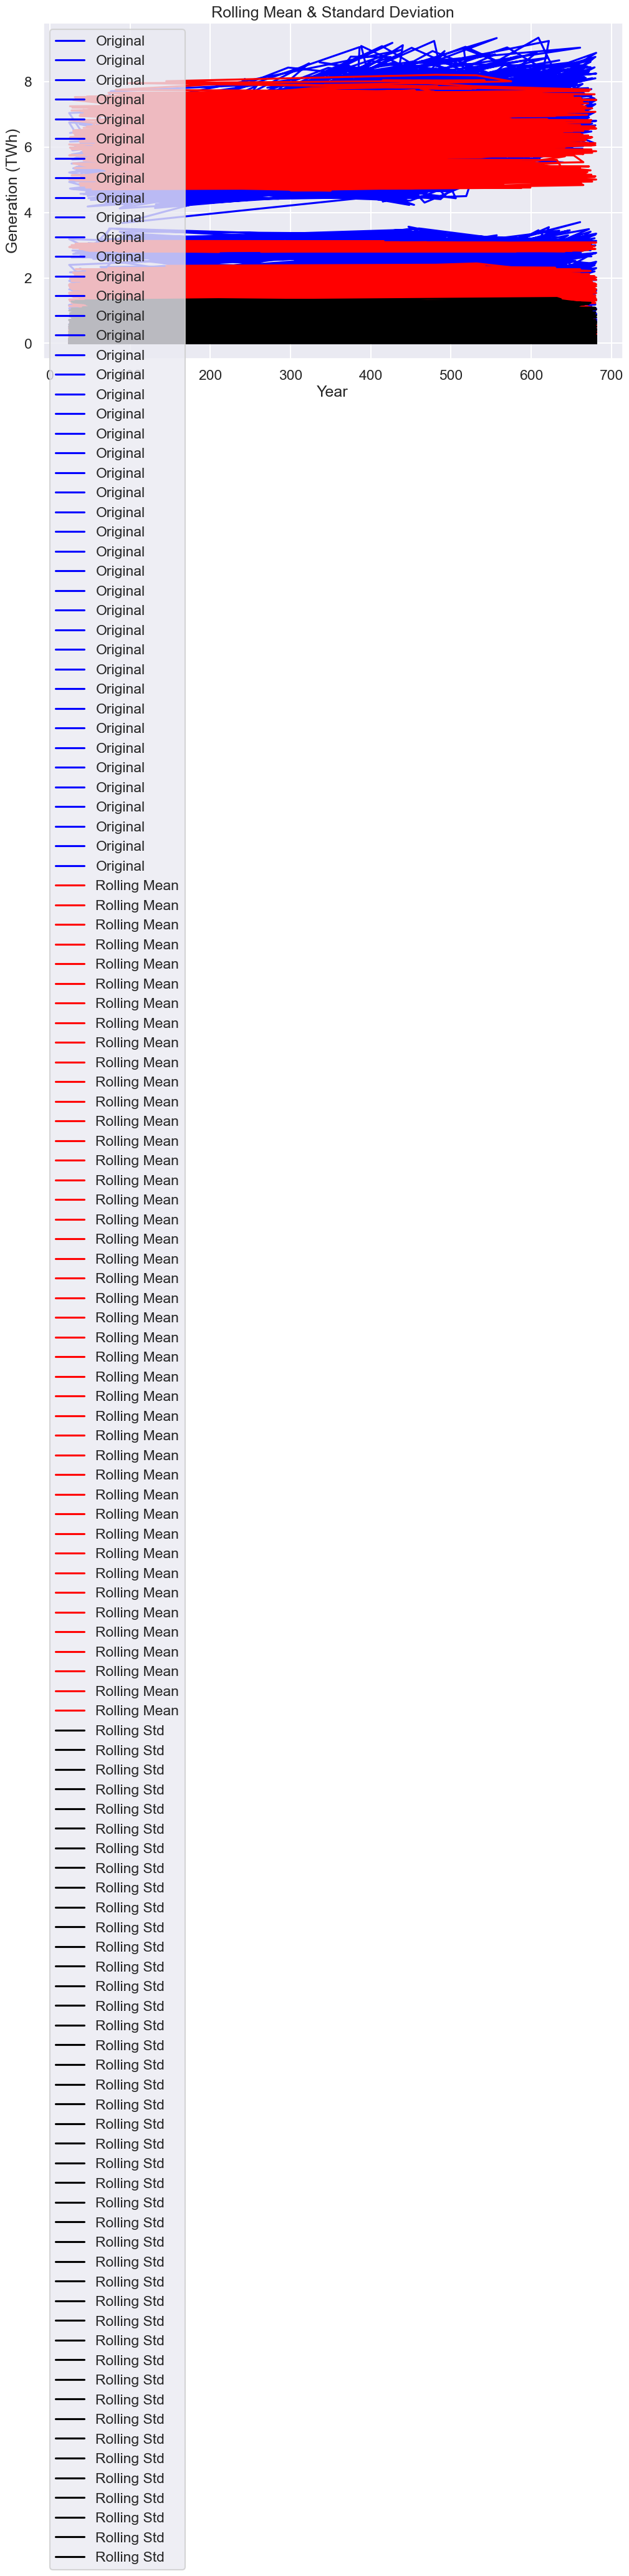

In [440]:
fig = plt.figure(figsize=(12,7))
plt.plot(X_train, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel("Year")
plt.ylabel("Generation (TWh)")

In [429]:
import pandas as pd

# Assuming 'df_train' is your DataFrame
window_size = 12  # Adjust the window size as needed

# Apply rolling mean subtraction to each column
df_train_rolling_mean_subtracted = df_train.apply(lambda col: col - col.rolling(window=window_size).mean())

# Drop NaN values introduced by rolling mean calculation
df_train_rolling_mean_subtracted = df_train_rolling_mean_subtracted.dropna()

# Display the modified DataFrame
print(df_train_rolling_mean_subtracted.head())


Description  Electricity Net Generation Total (including from sources not shown), All Sectors  \
YYYYMM                                                                                          
197312.0                                          -1733.194667                                  
197401.0                                           2438.579833                                  
197402.0                                         -12301.799750                                  
197403.0                                          -4890.038083                                  
197404.0                                         -13147.460500                                  

Description  Biomass Energy Production  Coal Production  Crude Oil Production  \
YYYYMM                                                                          
197312.0                      0.002402        -0.016261              0.005132   
197401.0                      0.003300         0.078083             -0.014499

In [423]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the model
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_gb_params = gb_grid_search.best_params_
best_gb_model = gb_grid_search.best_estimator_

# Print the best parameters
print(f'Best Hyperparameters: {best_gb_params}')

# Make predictions using the best model
best_gb_predictions = best_gb_model.predict(X_valid)

# Evaluate the best model
best_gb_mae = mean_absolute_error(y_valid, best_gb_predictions)
best_gb_mse = mean_squared_error(y_valid, best_gb_predictions)
best_gb_r2 = r2_score(y_valid, best_gb_predictions)

print(f'Best Gradient Boosting - MAE: {best_gb_mae}, MSE: {best_gb_mse}, R^2: {best_gb_r2}')


KeyboardInterrupt: 

In [236]:
US_total_copy = US_total.reset_index().copy()
US_total_pivot = US_total_copy.pivot(index = 'DATE', columns='ENERGY SOURCE',values = 'Generation (TWh)').reset_index()

<Axes: xlabel='DATE'>

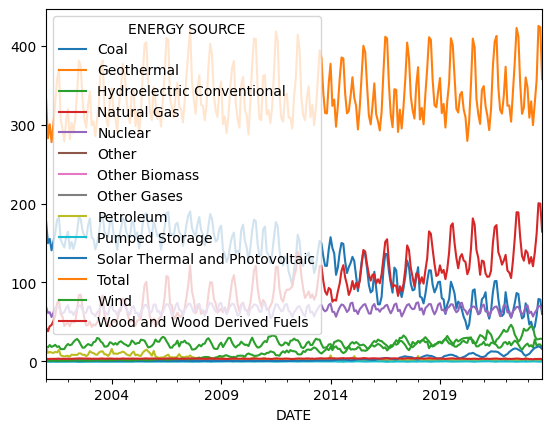

In [241]:
US_total_pivot.set_index('DATE').plot()

In [240]:
US_total_pivot

ENERGY SOURCE,DATE,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Total,Wind,Wood and Wood Derived Fuels
0,2001-01-01,177.287111,1.229325,18.852048,42.388663,68.707077,0.991669,1.208647,0.718442,18.111843,-0.588626,0.006500,332.493160,0.389250,3.191212
1,2001-02-01,149.735484,1.073044,17.472889,37.966927,61.272407,0.871949,1.096331,0.675659,10.341503,-0.706956,0.012568,282.940198,0.431242,2.697151
2,2001-03-01,155.269011,1.190023,20.477189,44.364414,62.140712,0.931155,1.189040,0.769181,11.733006,-0.773345,0.031498,300.706544,0.532120,2.852540
3,2001-04-01,140.670654,1.094991,18.012994,45.842746,56.003026,0.957456,1.187239,0.697843,10.863376,-0.795915,0.038759,278.078871,0.684695,2.821007
4,2001-05-01,151.592914,1.071380,19.175635,50.934205,61.512445,0.986268,1.210741,0.784555,10.389988,-0.622526,0.081053,300.491621,0.635029,2.739933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2023-05-01,43.852224,1.370720,27.479134,137.795292,61.472883,0.857479,1.370367,0.901065,1.188029,-0.450057,16.898529,327.532624,32.018246,2.778714
269,2023-06-01,57.697752,1.272720,19.470633,161.692703,64.965076,0.847597,1.322095,0.895046,1.288477,-0.542346,17.601367,356.672385,27.505935,2.655331
270,2023-07-01,78.909857,1.303275,21.237808,200.506759,69.887588,0.870218,1.362801,0.995442,1.669222,-0.648394,18.841492,425.611328,27.867909,2.807352
271,2023-08-01,78.184501,1.340519,21.145866,199.993042,69.744023,0.814881,1.353127,1.151372,1.690722,-0.644043,17.765584,423.934257,28.504167,2.890496


In [196]:
sp500_url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=979776000&period2=1696032000&interval=1mo&events=history&includeAdjustedClose=true'
sp500 = pd.read_csv(sp500_url)

In [ ]:
global_weather_url = ''

In [197]:
sp500

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-02-01,1366.010010,1376.380005,1215.439941,1239.939941,1239.939941,21644400000
1,2001-03-01,1239.939941,1267.420044,1081.189941,1160.329956,1160.329956,27806610000
2,2001-04-01,1160.329956,1269.300049,1091.989990,1249.459961,1249.459961,25409990000
3,2001-05-01,1249.459961,1315.930054,1232.000000,1255.819946,1255.819946,24525900000
4,2001-06-01,1255.819946,1286.619995,1203.030029,1224.380005,1224.380005,24748030000
...,...,...,...,...,...,...,...
267,2023-05-01,4166.790039,4231.100098,4048.280029,4179.830078,4179.830078,88929200000
268,2023-06-01,4183.029785,4458.479980,4171.640137,4450.379883,4450.379883,87983140000
269,2023-07-01,4450.479980,4607.069824,4385.049805,4588.959961,4588.959961,75063200000
270,2023-08-01,4578.830078,4584.620117,4335.310059,4507.660156,4507.660156,86840820000


In [24]:
gdp_url = "https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
destination_folder = 'LOCAL DATA\GDP'
csv_file_name = 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6224532.csv'

def download_gdp_data(gdp_url, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    response = requests.get(gdp_url)
    if response.status_code == 200:
        zip_content = io.BytesIO(response.content)

        with zipfile.ZipFile(zip_content, 'r') as zip_ref:
            zip_ref.extractall(destination_folder)
        
        print(f"Download and extraction completed. Files are in: {destination_folder}")
    else:
        print(f"Failed to download the zip file. Status code: {response.status_code}")

def download_gdp_data(folder_path, csv_file_name):
    csv_file_path = os.path.join(folder_path, csv_file_name)

    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path, skiprows=4)
        return df
    else:
        print(f"CSV file '{csv_file_name}' not found in the specified folder.")
        return None

    
download_gdp_data(gdp_url, destination_folder)

gdp_df = download_gdp_data(destination_folder, csv_file_name)
gdp_df = gdp_df.set_index(gdp_df.columns[0]).transpose()['United States'].iloc[44:66]
gdp_df = pd.DataFrame(gdp_df).reset_index()
gdp_df.columns = ['year','GDP']
gdp_df['year'] = pd.to_datetime(gdp_df['year'])
gdp_df = gdp_df.infer_objects()



CSV file 'LOCAL DATA\GDP' not found in the specified folder.


Power generation data

In [27]:
from EIA_DATA.generation_data import get_generation_data

In [28]:
raw_gneration_df = get_generation_data()

Power Plant data

In [29]:
from EIA_DATA.plant_data import get_plant_data

In [30]:
raw_plant_df = get_plant_data()

Successfully downloaded and unzipped https://www.eia.gov/electricity/data/eia860/xls/eia8602022.zip


## Clean the data

### First the generation data

When we got the data from the excel file it grabbed rows above the headers. We can find all values in the 'YEAR' column and remove them from the dataframe. We can also remove rows that have values that are NaN. We can also check the integrity of the data by looking for duplicate rows. 

In [31]:
invalid_rows = raw_gneration_df[raw_gneration_df['YEAR'].str.isnumeric() == False]
gen_df = raw_gneration_df.drop(invalid_rows.index).dropna()
gen_df.duplicated().sum()



0

To ensure we didn't have change our data too much we check the shape of the dataframe before and after.

In [32]:
print("Shape of raw_df:")
print(raw_gneration_df.shape)

print("\nShape of df:")
print(gen_df.shape)

removed_rows = raw_gneration_df.shape[0] - gen_df.shape[0]
print(f'We removed {removed_rows} row(s).')

Shape of raw_df:
(530838, 6)

Shape of df:
(530790, 6)
We removed 48 row(s).


We can change the date types to make our data easier to work with. Then check what they are after we have changed them.

In [33]:
gen_df = gen_df.infer_objects()
gen_df.dtypes


YEAR                            int64
MONTH                           int64
STATE                          object
TYPE OF PRODUCER               object
ENERGY SOURCE                  object
GENERATION (Megawatthours)    float64
dtype: object

We want to take the year and month columns and convert them into a date colum we can use to index the dataframe. We dont have a day of the month so we just use a constant value of 1. We can not get rid of the year and month columns to clean up the dataframe. We also want to infer objects again because we changed the headers and added a datetime column.

In [34]:
gen_df['DATE'] = pd.to_datetime(gen_df[['YEAR', 'MONTH']].assign(day=1),errors='coerce')
gen_df.set_index('DATE', inplace=True)
gen_df.drop(['YEAR', 'MONTH'], axis=1, inplace=True)
gen_df.head()

gen_df = gen_df.infer_objects()
gen_df.dtypes


STATE                          object
TYPE OF PRODUCER               object
ENERGY SOURCE                  object
GENERATION (Megawatthours)    float64
dtype: object

Converting the 'STATE' column to uppercase ensures a consistent and standardized representation of state names.

In [35]:
gen_df['STATE'] = gen_df['STATE'].str.upper()

The unit Megawatt-hours (MWh) is very small when dealing with net generation so we will reduce it to make it more manageable. We are going to use a Terawatt-hour (TWh) which is equal to 1 million Megawatt-hours. For reference the average house hold uses 10,632 kilowatt-hours per year or .00001063 TWh.

In [36]:
gen_df["Generation (TWh)"] = gen_df["GENERATION (Megawatthours)"]/1000000
gen_df.drop(['GENERATION (Megawatthours)'], axis=1, inplace=True)

### Now the power plant data

In [37]:
raw_plant_df.columns

Index(['Utility ID', 'Utility Name', 'Plant Code', 'Plant Name', 'State',
       'County', 'Generator ID', 'Technology', 'Prime Mover', 'Unit Code',
       'Ownership', 'Duct Burners',
       'Can Bypass Heat Recovery Steam Generator?',
       'RTO/ISO LMP Node Designation',
       'RTO/ISO Location Designation for Reporting Wholesale Sales Data to FERC',
       'Nameplate Capacity (MW)', 'Nameplate Power Factor',
       'Summer Capacity (MW)', 'Winter Capacity (MW)', 'Minimum Load (MW)',
       'Uprate or Derate Completed During Year',
       'Month Uprate or Derate Completed', 'Year Uprate or Derate Completed',
       'Status', 'Synchronized to Transmission Grid', 'Operating Month',
       'Operating Year', 'Planned Retirement Month', 'Planned Retirement Year',
       'Associated with Combined Heat and Power System', 'Sector Name',
       'Sector', 'Topping or Bottoming', 'Energy Source 1', 'Energy Source 2',
       'Energy Source 3', 'Energy Source 4', 'Energy Source 5',
       'Ene

In [38]:
raw_plant_df.duplicated().sum()

0

### Make some copies of the data

Now that we have our data cleaned we will make a copy of the data frame to hold entegrity of the data

In [39]:
raw_df_copy = gen_df.copy()
raw_df_copy.shape

(530790, 4)

We will also make the df into a csv if we need to pull into excel to better understand

In [40]:
raw_plant_df.to_csv('planttest.csv', index=False)

gen_df_reset = gen_df.reset_index()
gen_df_reset.to_csv('net_generation_df.csv', index=True)

# Start of analysis

### Getting to know the data

We need to know more about the gen_df DataFrame to start

To better understand our data we can get all they types of producers and the types of energy sources by using the .unique() method. This will also help us validate that we cleaned the data correctly. 

In [41]:
types_producer = gen_df['TYPE OF PRODUCER'].unique()
types_producer

array(['Total Electric Power Industry',
       'Electric Generators, Electric Utilities',
       'Combined Heat and Power, Electric Power',
       'Combined Heat and Power, Commercial Power',
       'Combined Heat and Power, Industrial Power',
       'Electric Generators, Independent Power Producers'], dtype=object)

In [42]:
gen_df['ENERGY SOURCE'].unique()

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

We can check on 'GENERATION (Twh)' column and get some statistics that will describe our dataset. 

In [43]:
gen_df['Generation (TWh)'].describe()

count    530790.000000
mean          1.390318
std          10.785769
min          -0.997855
25%           0.001574
50%           0.022916
75%           0.277950
max         425.611328
Name: Generation (TWh), dtype: float64

We see that our standard diviation is very high and there is a large gap between the percentiles. This tell us that there is many outliers and values that are zero. Anohter thing to note is that the min value is a negitive number. This is data on the generaion of electiricy so we went to know why type of energy source is pulling power instead of producing it. 

We can plot a histogram to see how the data is distributed and get a visual representation. 

<Axes: >

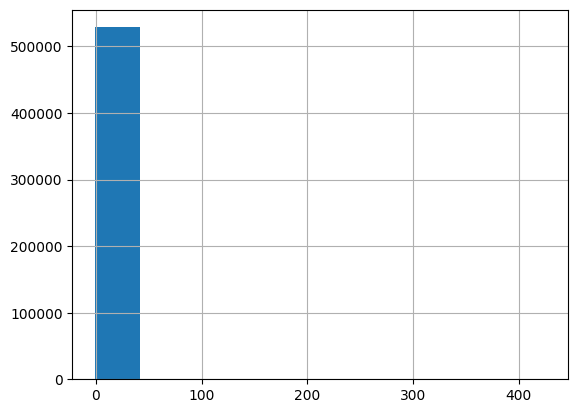

In [44]:
gen_df['Generation (TWh)'].hist()
#come back and add label and a title


The visual representation validates our observations from the describe() table, indicating a concentration of values around zero and notable outliers at the upper end. However, it's important to note that this graph represents a broad overview, encompassing diverse sources, states, and their totals spanning from 2001 to 2023. To narrow our focus and derive more targeted insights, we plan to apply filters, selecting specific subsets of data such as totals, specific sources, or particular states for further analysis.

In [45]:
gen_df['TYPE OF PRODUCER'].value_counts()


TYPE OF PRODUCER
Total Electric Power Industry                       143564
Electric Generators, Electric Utilities             100222
Electric Generators, Independent Power Producers     95985
Combined Heat and Power, Industrial Power            82955
Combined Heat and Power, Commercial Power            58112
Combined Heat and Power, Electric Power              49952
Name: count, dtype: int64

We can see there are really three categories in the producer columns. 
- Electric Generators
- Combined Heat and Power
- Total Electric Power Industry

Each have a subcategory too.

We can now do the same for the plant_df DataFrame

# Key research areas

## Total US power generation by month

#### Understanding the Total electric power generation

We will start our analysis on the 'Total Electric Power Industry' to begin

Totals are already calculated in the df so we will just need to pull the right columns.

In [46]:
total=gen_df.loc[gen_df['TYPE OF PRODUCER']=='Total Electric Power Industry']
US_total=total.loc[total['STATE']=='US-TOTAL']
US_source=US_total.groupby(by=[US_total.index,"ENERGY SOURCE"]).sum().reset_index()

In [47]:
US_source

,DATE,ENERGY SOURCE,STATE,TYPE OF PRODUCER,Generation (TWh)
0,2001-01-01,Coal,US-TOTAL,Total Electric Power Industry,177.287111
1,2001-01-01,Geothermal,US-TOTAL,Total Electric Power Industry,1.229325
2,2001-01-01,Hydroelectric Conventional,US-TOTAL,Total Electric Power Industry,18.852048
3,2001-01-01,Natural Gas,US-TOTAL,Total Electric Power Industry,42.388663
4,2001-01-01,Nuclear,US-TOTAL,Total Electric Power Industry,68.707077
...,...,...,...,...,...
3817,2023-09-01,Pumped Storage,US-TOTAL,Total Electric Power Industry,-0.543781
3818,2023-09-01,Solar Thermal and Photovoltaic,US-TOTAL,Total Electric Power Industry,15.529558
3819,2023-09-01,Total,US-TOTAL,Total Electric Power Industry,358.136260
3820,2023-09-01,Wind,US-TOTAL,Total Electric Power Industry,28.193292


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


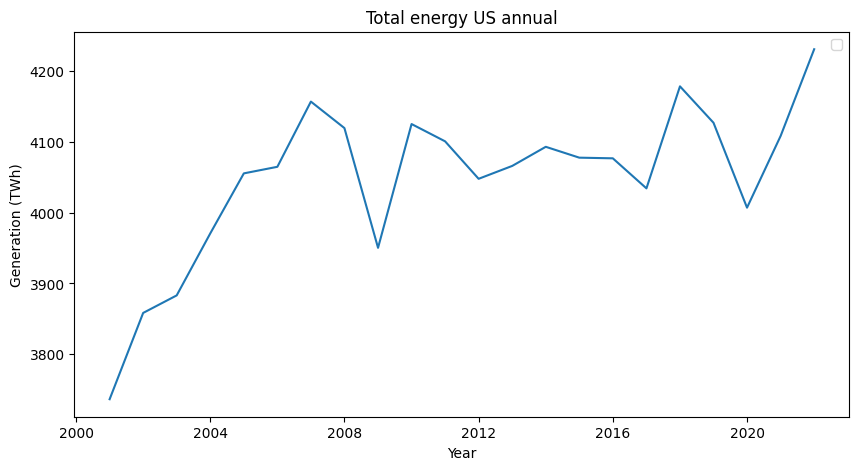

In [48]:
US_total_month=US_source[(US_source['ENERGY SOURCE']=='Total')]

US_total_year = US_total_month.groupby(US_total_month['DATE'].dt.year, as_index=False).agg({'DATE': 'first', 'Generation (TWh)': 'sum'})

US_total_year = US_total_year[US_total_year['DATE'].dt.year != 2023]

plt.figure(figsize=(10,5))
sns.color_palette("tab10")
sns.lineplot(data=US_total_year, x=US_total_year['DATE'] \
             ,y=US_total_year['Generation (TWh)'])
plt.title("Total energy US annual")
plt.xlabel("Year")
plt.legend(loc='best')
plt.show()

In [49]:
US_total_year

,DATE,Generation (TWh)
0,2001-01-01,3736.643649
1,2002-01-01,3858.452251
2,2003-01-01,3883.185204
3,2004-01-01,3970.555264
4,2005-01-01,4055.422750
5,2006-01-01,4064.702227
6,2007-01-01,4156.744725
7,2008-01-01,4119.387759
8,2009-01-01,3950.330927
9,2010-01-01,4125.059899


In [50]:
US_total_year

,DATE,Generation (TWh)
0,2001-01-01,3736.643649
1,2002-01-01,3858.452251
2,2003-01-01,3883.185204
3,2004-01-01,3970.555264
4,2005-01-01,4055.422750
5,2006-01-01,4064.702227
6,2007-01-01,4156.744725
7,2008-01-01,4119.387759
8,2009-01-01,3950.330927
9,2010-01-01,4125.059899


In [51]:
# add growth rates per year and trend line

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


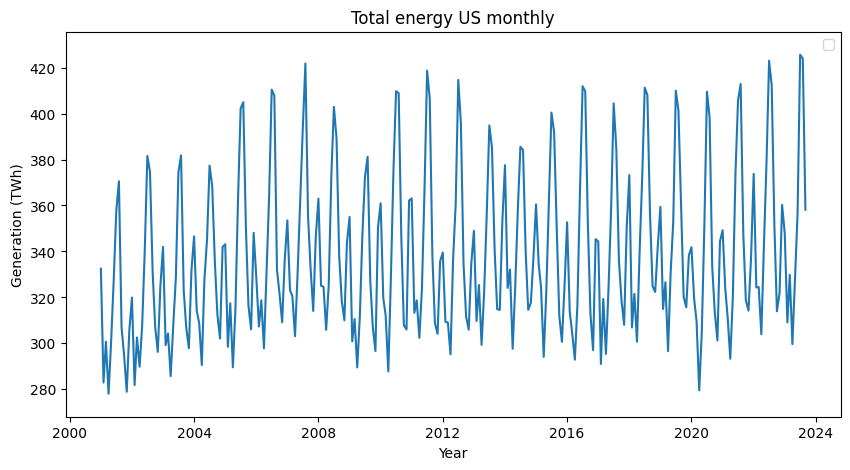

In [52]:
US_total_month=US_source[(US_source['ENERGY SOURCE']=='Total')]

plt.figure(figsize=(10,5))
sns.color_palette("tab10")
sns.lineplot(data=US_total_month, x=US_total_month['DATE'] \
             ,y=US_total_month['Generation (TWh)'])
plt.ylim(US_total_month['Generation (TWh)'].min() - 10, US_total_month['Generation (TWh)'].max() + 10) 
plt.title("Total energy US monthly")
plt.xlabel("Year")
plt.legend(loc='best')
plt.show()

## Energy Production by state

Now that we have looked at the totals we want to look net generation by state. So we dont double count any values we will make a DataFrame that is the inverse of the totals DataFrame by taking out all of the US-Total values. 

Similar to how we separated the totals from the rest of the data we will pull totals out so we dont double count when we group by states

In [53]:
state_df = gen_df[(gen_df['STATE'] != 'US-TOTAL') & 
              (gen_df['TYPE OF PRODUCER'] != 'Total Electric Power Industry') & 
              (gen_df['ENERGY SOURCE'] == 'Total')]

Make some more DataFrames by grouping by states: month year and all-time

In [54]:
state_total_month =state_df.groupby(by=[state_df.index,"STATE"]).sum().reset_index()
state_total_year =state_df.groupby(by=[state_df.index.year,"STATE"]).sum().reset_index()
state_total_alltime =state_df.groupby(by=["STATE"]).sum().reset_index().sort_values(by='Generation (TWh)')
state_total_alltime.shape

(51, 4)

By sorting the values we can see the state that has produced the most electricity in the last 22 years cumulative.

In [55]:
TimePeriodOfData = (state_df.index.year.unique().max()) - (state_df.index.year.unique().min())
TimePeriodOfData

22

In [56]:
state_total_month_top10=state_total_alltime[['STATE','Generation (TWh)']].sort_values(by='Generation (TWh)', ascending=False).iloc[:10]
state_total_month_top10[['STATE','Generation (TWh)']]

,STATE,Generation (TWh)
43,TX,9894.888992
9,FL,5218.290742
38,PA,5036.201059
4,CA,4568.488753
14,IL,4341.616358
1,AL,3261.197689
35,OH,3109.237906
34,NY,3088.521236
10,GA,2930.871739
27,NC,2882.807861


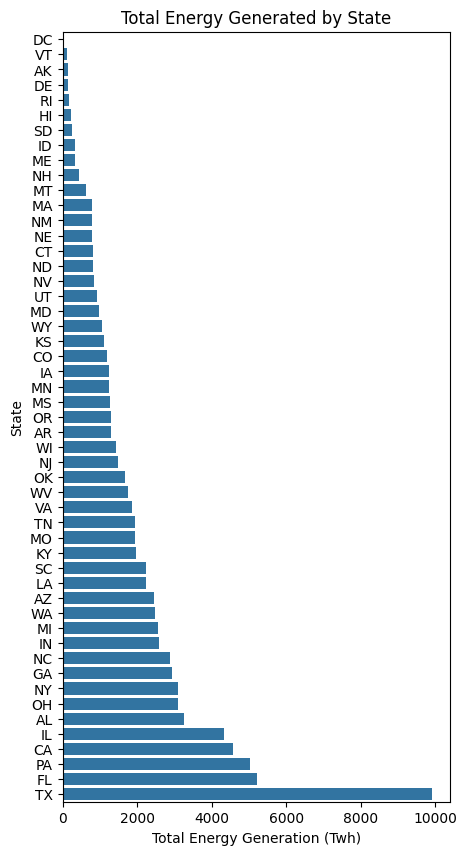

In [57]:
plt.figure(figsize=(5, 10))
sns.barplot(x='Generation (TWh)', y='STATE', data=state_total_alltime,errorbar=None)
plt.xlabel('Total Energy Generation (Twh)')
plt.ylabel('State')
plt.title('Total Energy Generated by State')

plt.show()

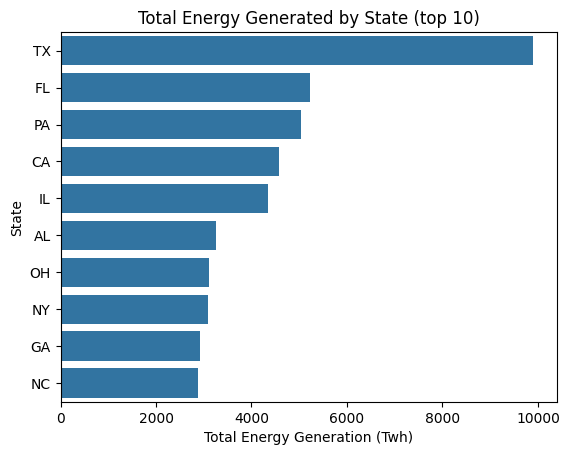

In [58]:
state_total_alltime['AVG Generation'] = state_total_alltime['Generation (TWh)']/TimePeriodOfData
state_total_alltime['Percent of total US generation'] = (state_total_alltime['Generation (TWh)']/state_total_alltime['Generation (TWh)'].sum())
state_total_alltime['Percent of total US generation'] = (state_total_alltime['Percent of total US generation'] * 100).map("{:.2f}%".format)


state_total_alltime[['STATE','Generation (TWh)','AVG Generation','Percent of total US generation']].sort_values(by= 'Generation (TWh)',ascending = False).head(5)

sns.barplot(x='Generation (TWh)', y='STATE', data=state_total_month_top10,errorbar=None)
sns.color_palette("tab10")
plt.xlabel('Total Energy Generation (Twh)')
plt.ylabel('State')
plt.title('Total Energy Generated by State (top 10)')

plt.show()

In [59]:
# change these over to heat maps

In [60]:
type_producer_year['TYPE OF PRODUCER'].unique()

NameError: name 'type_producer_year' is not defined

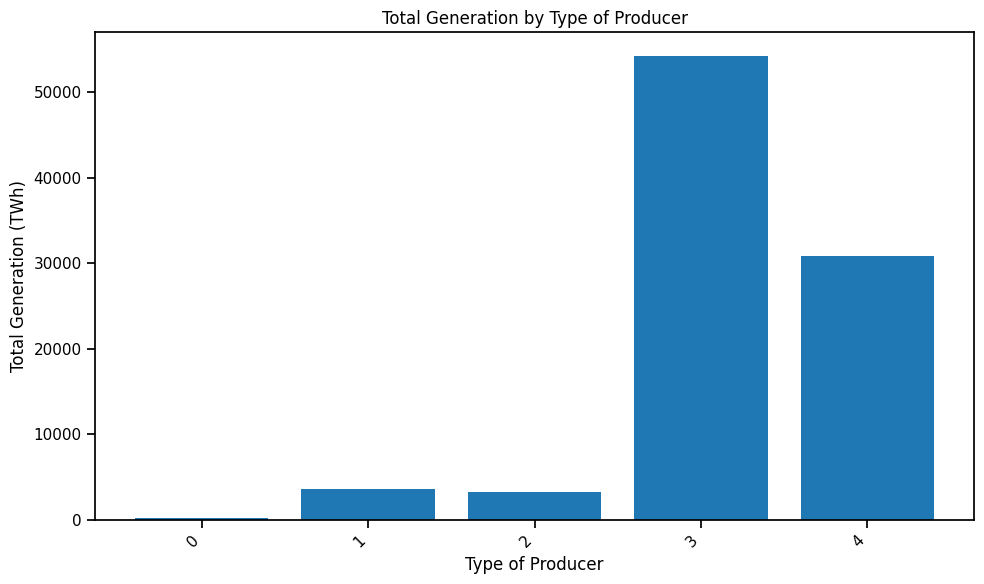

In [ ]:
type_producer = gen_df[(gen_df['STATE'] == 'US-TOTAL') & 
              (gen_df['TYPE OF PRODUCER'] != 'Total Electric Power Industry') & 
              (gen_df['ENERGY SOURCE'] == 'Total')].reset_index()

type_producer_year = type_producer.groupby(by = type_producer['TYPE OF PRODUCER']).sum('Generation (TWh)').reset_index()

plt.figure(figsize=(10, 6))
plt.bar(type_producer_year.index, type_producer_year['Generation (TWh)'])
plt.xlabel('Type of Producer')
plt.ylabel('Total Generation (TWh)')
plt.title('Total Generation by Type of Producer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

Might want to add per capita data and graph it againt the total generation. 

## Energy Sources

In [ ]:
US_source_no_total=US_source[(US_source['ENERGY SOURCE']!='Total')]
US_source_no_total[['DATE','ENERGY SOURCE','Generation (TWh)']].sort_values(by = 'Generation (TWh)', ascending= False).head()

,DATE,ENERGY SOURCE,Generation (TWh)
3783,2023-07-01,Natural Gas,200.506759
3797,2023-08-01,Natural Gas,199.993042
1106,2007-08-01,Coal,190.134816
938,2006-08-01,Coal,189.454930
3615,2022-07-01,Natural Gas,189.042160


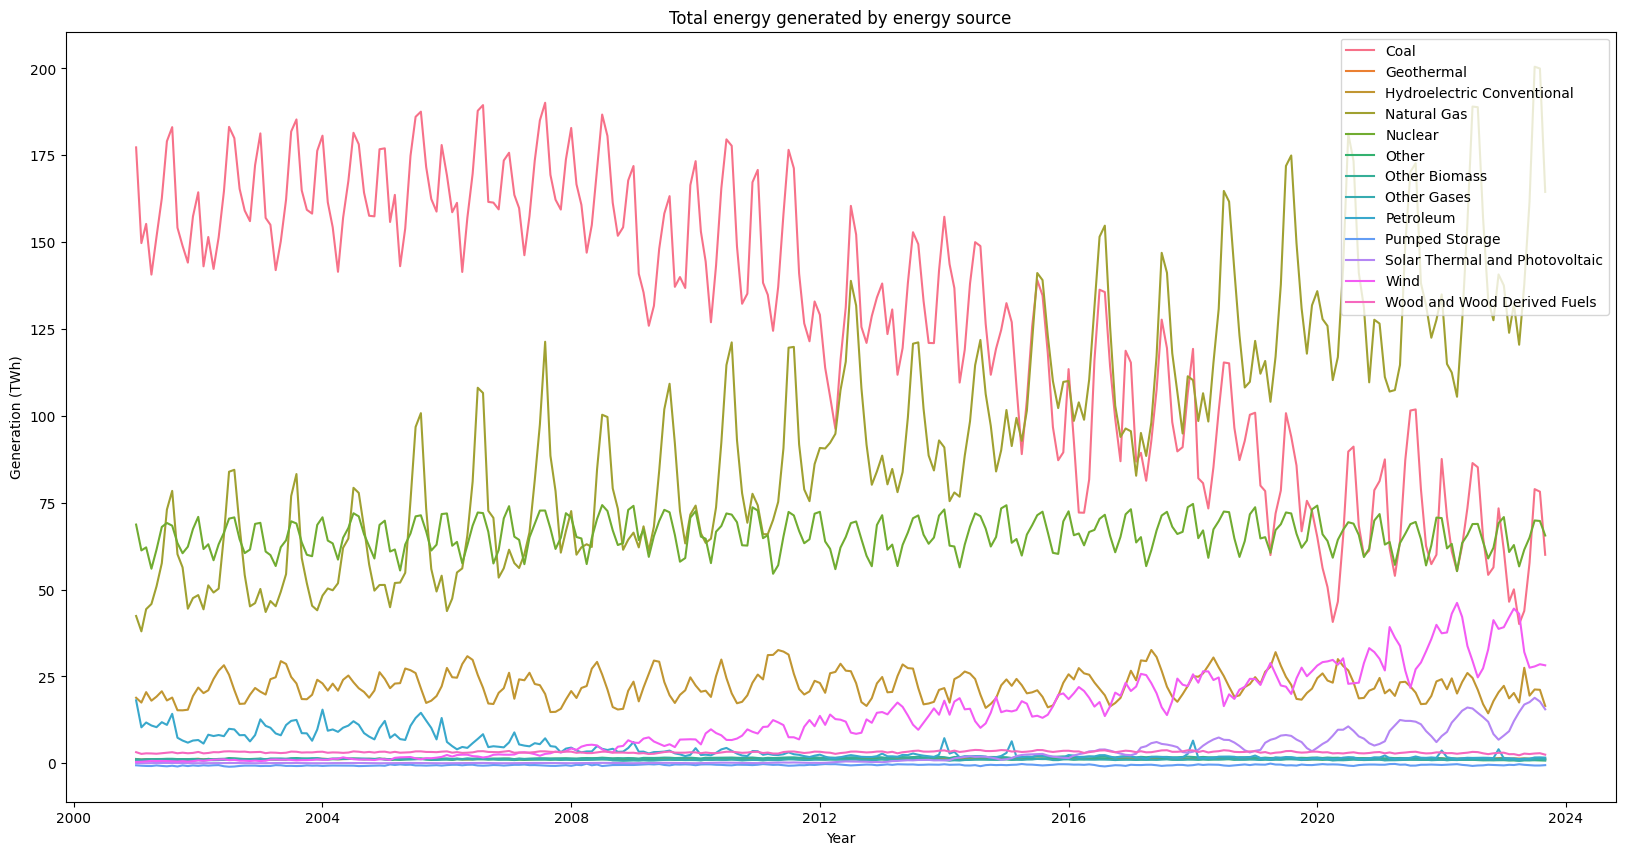

In [ ]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.lineplot(data=US_source_no_total, x=US_source_no_total['DATE'] \
             ,y=US_source_no_total['Generation (TWh)'],hue="ENERGY SOURCE")
plt.title("Total energy generated by energy source")
plt.xlabel("Year")
plt.legend(loc='best')
plt.show()

In [ ]:
#Trent add bar here

This chart is very busy so we can break down the energy sources into three groups High Med and Small

In [ ]:
top_3 = ['Coal' ,'Natural Gas', 'Nuclear'] 
US_top3=US_source[US_source['ENERGY SOURCE'].isin(top_3)]
US_top3.head()

,DATE,ENERGY SOURCE,STATE,TYPE OF PRODUCER,Generation (TWh)
0,2001-01-01,Coal,US-TOTAL,Total Electric Power Industry,177.287111
3,2001-01-01,Natural Gas,US-TOTAL,Total Electric Power Industry,42.388663
4,2001-01-01,Nuclear,US-TOTAL,Total Electric Power Industry,68.707077
14,2001-02-01,Coal,US-TOTAL,Total Electric Power Industry,149.735484
17,2001-02-01,Natural Gas,US-TOTAL,Total Electric Power Industry,37.966927


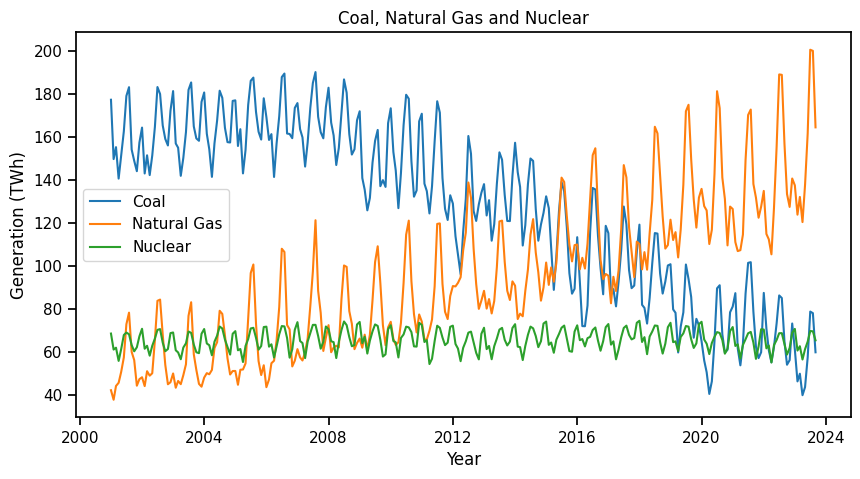

In [ ]:
plt.figure(figsize=(10,5))
sns.color_palette("tab10")
sns.lineplot(data=US_top3, x=US_top3['DATE'] ,y=US_top3['Generation (TWh)'],hue="ENERGY SOURCE")
plt.title("Coal, Natural Gas and Nuclear")
plt.xlabel("Year")
plt.legend(loc='best')

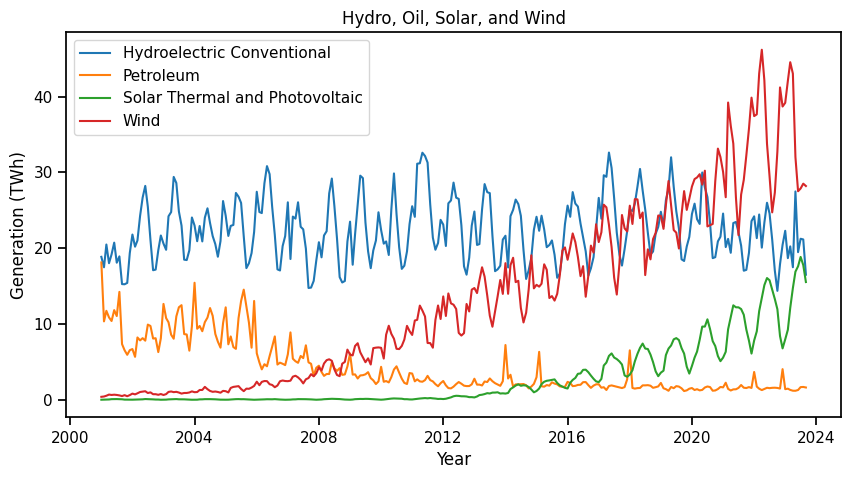

In [ ]:
snd_4 = ['Wind' ,'Hydroelectric Conventional', 'Solar Thermal and Photovoltaic', 'Petroleum'] 
US_snd4=US_source[US_source['ENERGY SOURCE'].isin(snd_4)]

plt.figure(figsize=(10,5))
sns.color_palette("viridis")
sns.lineplot(data=US_snd4, x=US_snd4['DATE'] ,y=US_snd4['Generation (TWh)'],hue="ENERGY SOURCE")
plt.title("Hydro, Oil, Solar, and Wind")
plt.xlabel("Year")
plt.legend(loc='best')

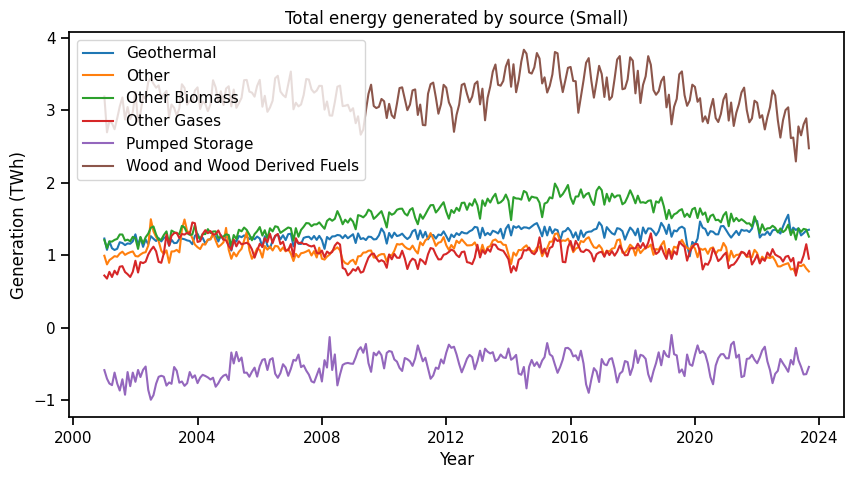

In [ ]:
bottom=['Other','Other Gases','Pumped Storage','Wood and Wood Derived Fuels'\
        ,'Other Biomass','Geothermal']
US_bot=US_source[US_source['ENERGY SOURCE'].isin(bottom)]

plt.figure(figsize=(10,5))
sns.color_palette("deep")
sns.lineplot(data=US_bot, x=US_bot['DATE'] ,y=US_bot['Generation (TWh)'],hue="ENERGY SOURCE")
plt.title("Total energy generated by source (Small)")
plt.xlabel("Year")
plt.legend(loc='upper left')

We can also look at look at the three that look to be growing the most, Natrual gas, wind, and solar.

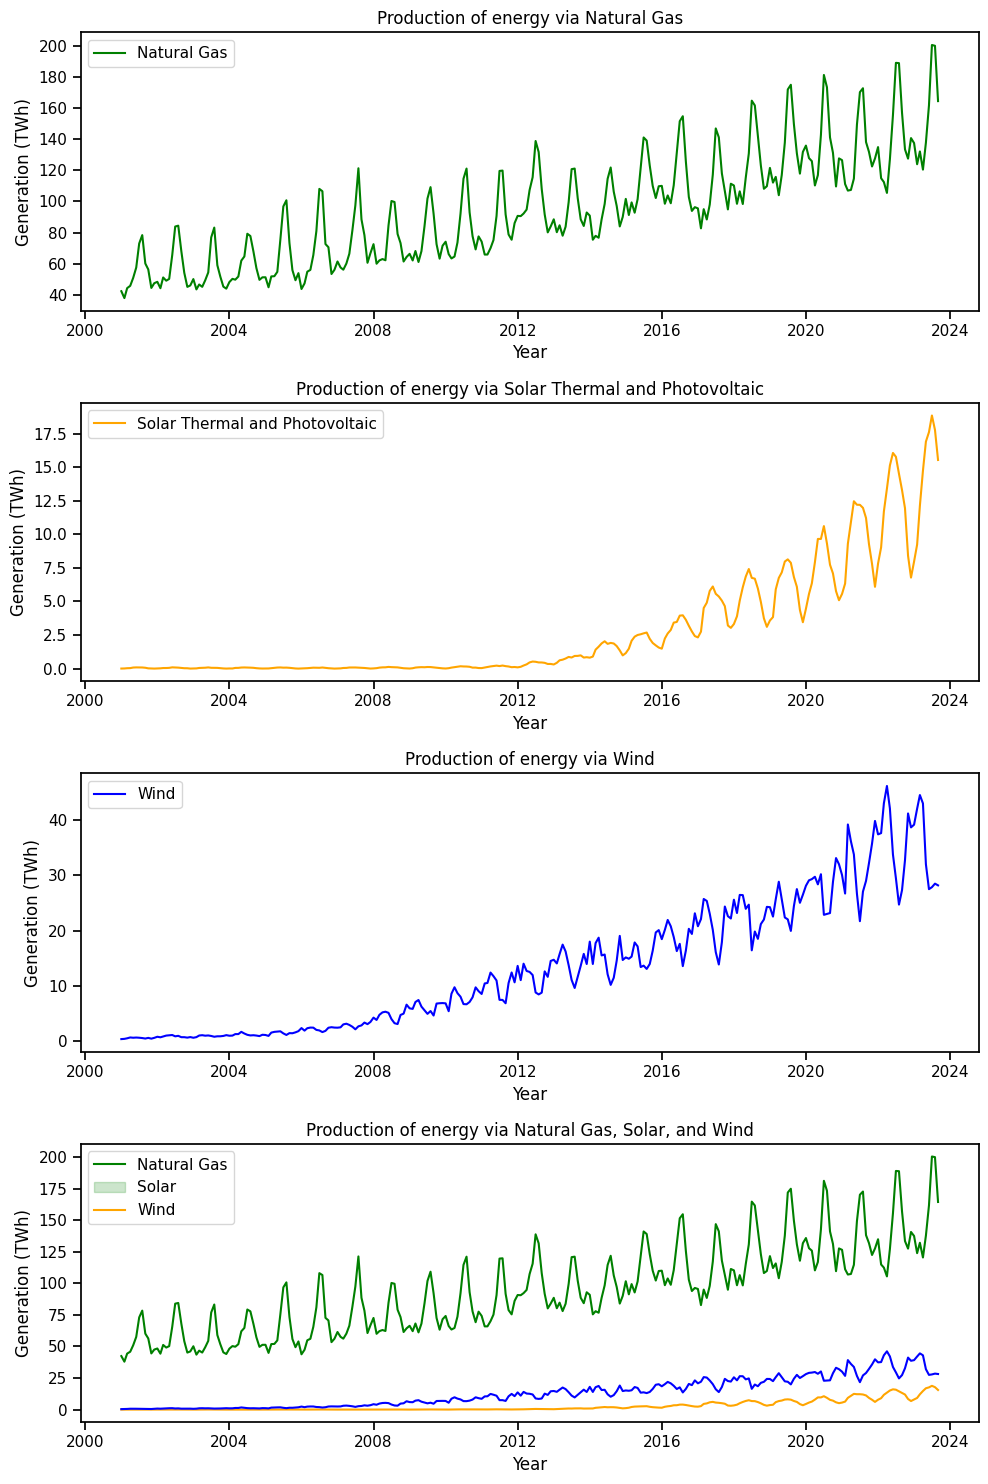

In [ ]:
sns.set_context("notebook")
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

def plot_energy_source(ax, df, energy_source, color):
    source_data = df.loc[df['ENERGY SOURCE'] == energy_source]
    sns.lineplot(x=source_data.index, y=source_data['Generation (TWh)'], color=color, ax=ax)
    ax.set_title(f'Production of energy via {energy_source}')
    ax.set_xlabel("Year")
    ax.set_ylabel("Generation (TWh)")
    ax.legend([energy_source]) 

plot_energy_source(axs[0], US_total, 'Natural Gas', 'green')
plot_energy_source(axs[1], US_total, 'Solar Thermal and Photovoltaic', 'orange')
plot_energy_source(axs[2], US_total, 'Wind', 'blue')
ax_combined = axs[3]

plot_energy_source(ax_combined, US_total, 'Natural Gas', 'green')
plot_energy_source(ax_combined, US_total, 'Solar Thermal and Photovoltaic', 'orange')
plot_energy_source(ax_combined, US_total, 'Wind', 'blue')

ax_combined.set_title('Production of energy via Natural Gas, Solar, and Wind')
ax_combined.set_xlabel("Year")

ax_combined.legend(['Natural Gas', 'Solar', 'Wind'])

plt.tight_layout()
plt.show()

Who creates the most power? By state? By type of producer?

Plotted by themselves they look to grow very fast but when ploted together solar and windthe make up of net generation 

## Electircal power capacity

### How close is our current generation to our total capacity?

In [ ]:
plant_state_df = raw_plant_df[['Utility Name_x','State_x','Technology','Generator ID','Nameplate Capacity (MW)','Nameplate Power Factor']]
state_capacity = plant_state_df.groupby('State_x').sum('Nameplate Capacity (MW').sort_values(by = ['Nameplate Capacity (MW)'], ascending= False).head()

In [ ]:
plant_state_df['Nameplate Power Factor'].count()

620746

In [ ]:
state_capacity['Nameplate Capacity (MW)'].sum()

13425714.800000003

## Electricity Uses

'https://www.eia.gov/electricity/sales_revenue_price/xls/table_10.xlsx'

If on type goes up do the others fall by a factor

## Renewable Energy Growth by State:

In [ ]:
# Sean add solor data here

## Correlation between Energy Sources:

## Correlation GDP and Total electric production

# Conclusion 